In [ ]:
# iMPORTING NECESSARY LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
# Creating column names as a list
cols = ["landlord", "construction", "Govt_approved", "rooms", "property_type", "sqr_ft", "ready_to_move", "resale", "address", "long", "lat", "price"]

In [3]:
# Reading the csv file into python with the pre-assigned column names
df_train = pd.read_csv("C:/Users/Otinwa Ayomide/Downloads/Programming tools/archive (9)/data 2/train.csv", names = cols, header = 0)
# Printing the first 5 rows of data
df_train.head()


,landlord,construction,Govt_approved,rooms,property_type,sqr_ft,ready_to_move,resale,address,long,lat,price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   landlord       29451 non-null  object 
 1   construction   29451 non-null  int64  
 2   Govt_approved  29451 non-null  int64  
 3   rooms          29451 non-null  int64  
 4   property_type  29451 non-null  object 
 5   sqr_ft         29451 non-null  float64
 6   ready_to_move  29451 non-null  int64  
 7   resale         29451 non-null  int64  
 8   address        29451 non-null  object 
 9   long           29451 non-null  float64
 10  lat            29451 non-null  float64
 11  price          29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
construction,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Govt_approved,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
rooms,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
sqr_ft,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
ready_to_move,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
resale,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
long,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
lat,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
price,29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [6]:
df_train.isnull().sum()

landlord         0
construction     0
Govt_approved    0
rooms            0
property_type    0
sqr_ft           0
ready_to_move    0
resale           0
address          0
long             0
lat              0
price            0
dtype: int64

In [7]:
# Checking for duplicate values
df_train.duplicated().sum()

401

In [8]:
# Dropping duplicates
df_train.drop_duplicates()

,landlord,construction,Govt_approved,rooms,property_type,sqr_ft,ready_to_move,resale,address,long,lat,price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


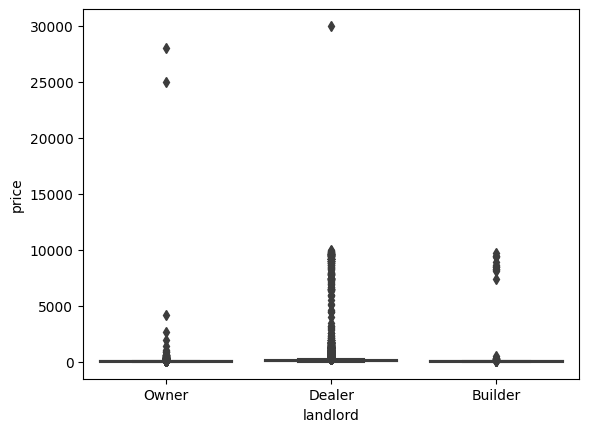

In [9]:
sns.boxplot(df_train, x = "landlord", y = "price")
plt.show()

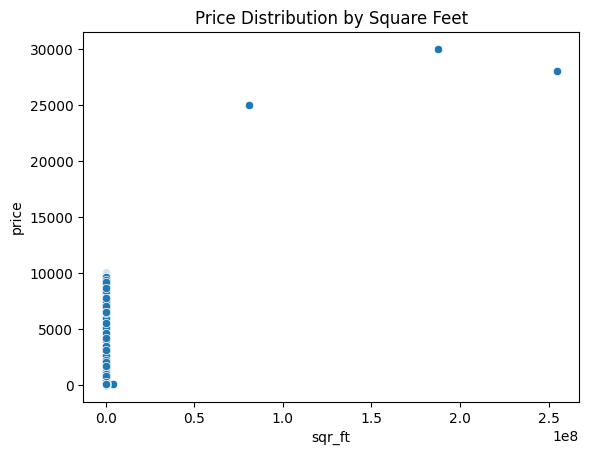

In [10]:
sns.scatterplot(df_train, x = "sqr_ft", y = "price")
plt.title("Price Distribution by Square Feet")
plt.show()

In [11]:
# Removed the outliers in the dataset for effective distribution

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# applying the function to the price column and sqr_ft column
df_train = remove_outliers_iqr(df_train, "price")
df_train = remove_outliers_iqr(df_train, "sqr_ft")

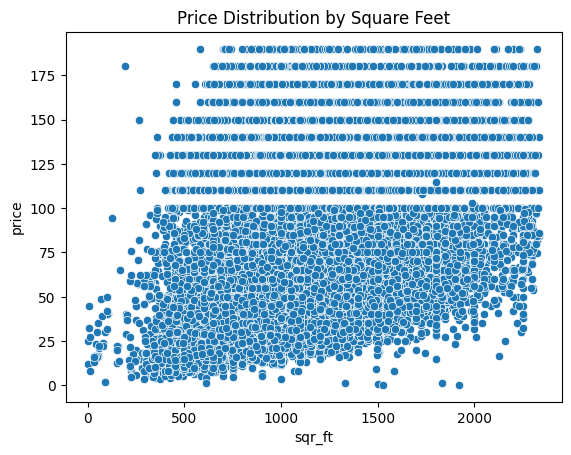

In [12]:
sns.scatterplot(df_train, x = "sqr_ft", y = "price")
plt.title("Price Distribution by Square Feet")
plt.show()

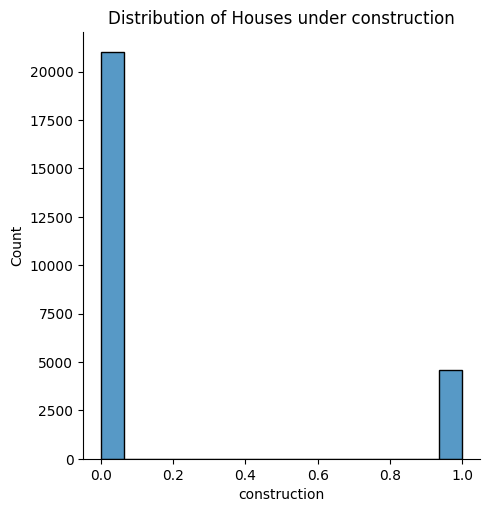

In [13]:
sns.displot(x = df_train["construction"])
plt.title("Distribution of Houses under construction")
plt.show()

C:\Users\Otinwa Ayomide\AppData\Local\Temp\ipykernel_33708\3428315476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


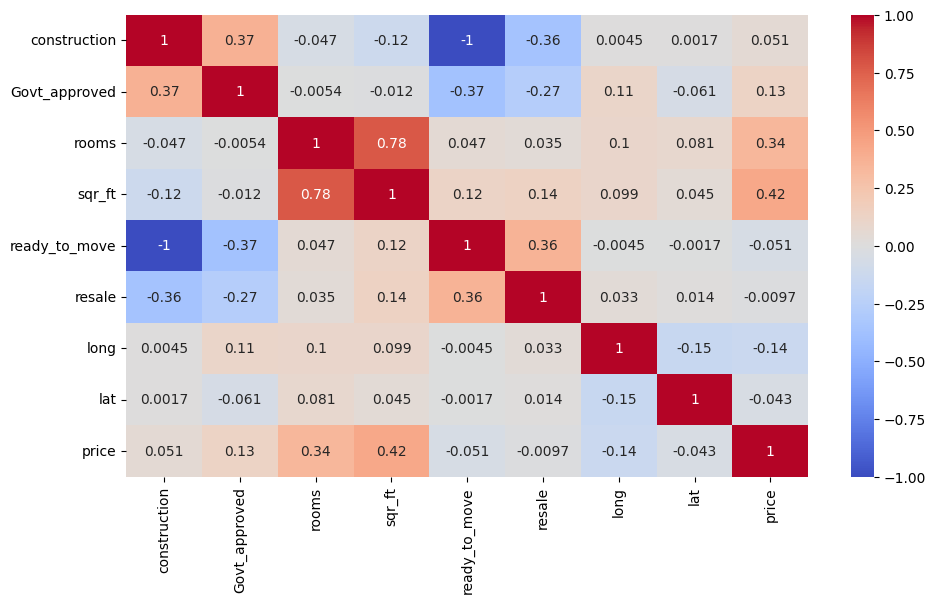

In [14]:
corr = df_train.corr()

plt.figure(figsize=(11,6))
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.show()

In [15]:
# The address column was split to take only the city column out of it
df_train["city"] = df_train["address"].apply(lambda x: x.split(",")[-1].strip())

In [16]:
# Creating new binary columns using the categorical variables
df_train = pd.get_dummies(df_train, columns = ["landlord", "property_type", "city"], drop_first=True) #drop_first removes the first column to avoid multicollinearity

In [17]:
df_train

,construction,Govt_approved,rooms,sqr_ft,ready_to_move,resale,address,long,lat,price,...,city_Varanasi,city_Vellore,city_Vijayawada,city_Visakhapatnam,city_Visnagar,city_Vizianagaram,city_Warangal,city_Wardha,city_Washim,city_Yavatmal
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0,...,0,0,0,0,0,0,0,0,0,0
29447,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,...,0,0,0,0,0,0,0,0,0,0
29448,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,...,0,0,0,0,0,0,0,0,0,0
29449,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_train.drop(["address"], axis = 1, inplace=True)

In [19]:
# Splitting the dataset for the independend variables (x)
x = df_train.drop(["price"], axis = 1) # Dropped the price column
# Splitting the data for target variable (y)
y = df_train["price"]

In [20]:
# Using the standard scaler library to standardize x
standard = StandardScaler()
# Fittig the module to x
standard.fit_transform(x)

array([[-0.46706228, -0.66072357, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ],
       [-0.46706228, -0.66072357, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ],
       [-0.46706228, -0.66072357, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ],
       ...,
       [-0.46706228, -0.66072357, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ],
       [-0.46706228, -0.66072357, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ],
       [-0.46706228,  1.51349224, -0.34319285, ..., -0.01977776,
        -0.00625318, -0.0088435 ]])

# Model

In [ ]:
# Splitting the data into training and test set
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 20% of the data is used for testing and 80% is used for training

In [ ]:
#Initializing the Linear Regression model
lr_model = LinearRegression()
#Initializing the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
#Initializing the Support vector machines model
svr_model = SVR()
#Initializing the Random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#Initializing the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# creating an ensemble model
ensemble_model = VotingRegressor(estimators=[('lr', lr_model), 
                                             ('dt', dt_model), 
                                             ('svr', svr_model), 
                                             ('rf', rf_model), 
                                             ('gb', gb_model)])

In [25]:
# Training all 6 models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(random_state=42)),
                            ('svr', SVR()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

In [ ]:
# creating a list to store results
results = []
#created a dictionary to store the model name and model
models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Support Vector Regression": svr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Voting Ensemble": ensemble_model
}
# Iterating through the dictionary and deriving the mse, mae and r2 score
for name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Appending the scores into the result list
    results.append([name, mse, r2, mae])

# Create a DataFrame to display results in a tabular form
results_df = pd.DataFrame(results, columns=['Model','MSE', 'R²', 'MAE'])

# Print the results
print(results_df)

                       Model          MSE        R²        MAE
0          Linear Regression   615.576222  0.609178  17.875300
1              Decision Tree   613.747910  0.610338  15.178658
2  Support Vector Regression  1392.819513  0.115715  25.512305
3              Random Forest   382.845882  0.756935  12.325959
4          Gradient Boosting   494.380900  0.686123  15.696498
5            Voting Ensemble   463.572452  0.705683  14.519205
